# Rayleigh-Bénard convection of a Darcy-Brinkman fluid in a partially porous rectangle

Refer to `A21.0_darcy_convection_equations.md` for details of the governing equations and non-dimensionalization. In the non-dimensionalization used for this problem, the domain's dimensionless length is unity so the rectangle's dimensionless width and depth are $L_x,L_y=\mathcal{O}(1)$. Furthermore if the domain length scale $\mathcal{L}_\Omega$ is chosen as the rectangle's depth, then $L_y=1$ and $L_x$ is the aspect ratio. 

horizontal rectangle

$$\Omega = [0, L_x] \times [0, 1]$$

$$\textbf{e}_g=-\textbf{e}_y \implies e_g^x=0~,~e_g^y=-1$$

constitutive relations

$$
\begin{align}
\phi &= 1 \\
\mathsf{D} &= \mathsf{I} \\
K^{-1}(y) &= \begin{cases}
1 & y < h \\
0 & y > h 
\end{cases} \\
\rho(c) &= -c
\end{align}
$$

diffusive base state initial conditions

$$c_0(x, y)=1 - y +\mathcal{N}(x,y)$$

$$\textbf{u}_0=\textbf{0}$$

prescribed temperature on upper and lower boundaries

$$c(x,y=0)=1$$

$$c(x,y=L_y)=0$$

no-flux on left and right boundaries

$$(\textbf{n}\cdot\nabla c)\vert_{x=0,y}=(\textbf{n}\cdot\nabla c)\vert_{x=L_x,y}=0$$

no-slip and no-penetration on entire boundary

$$\textbf{u}\vert_{\partial\Omega}=\textbf{0}$$

In [ ]:
from lucifex.sim import run
from lucifex.viz import plot_colormap, plot_line
from lucifex.io import write
from lucifex.utils import maximum

from demo.py.brinkman_convection import brinkman_convection_rayleigh_benard_rectangle


Pr = 1.0
Ra = 1e7
Da = 1e-5
simulation = brinkman_convection_rayleigh_benard_rectangle(
    Lx=2.0,
    Ly=1.0,    
    Nx=64,
    Ny=64,
    cell='quadrilateral',
    Pr=Pr,
    Ra=Ra,
    Da=Da,
    noise_eps=1e-2,
    dt_max=0.01, 
    cfl_courant=0.25,
)

n_stop = 1000
dt_init = 1e-6
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

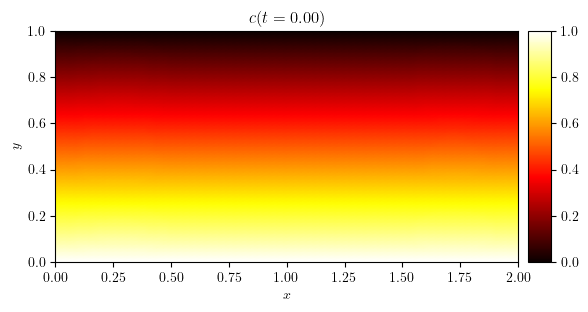

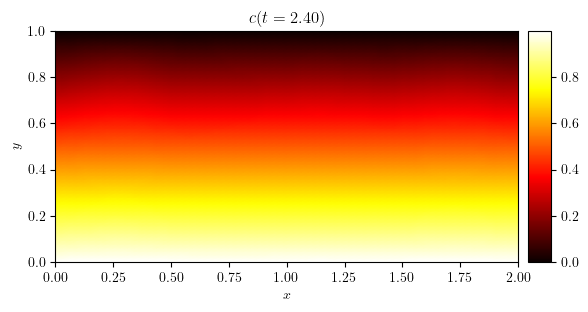

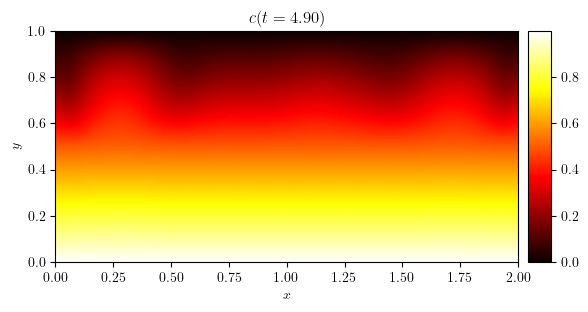

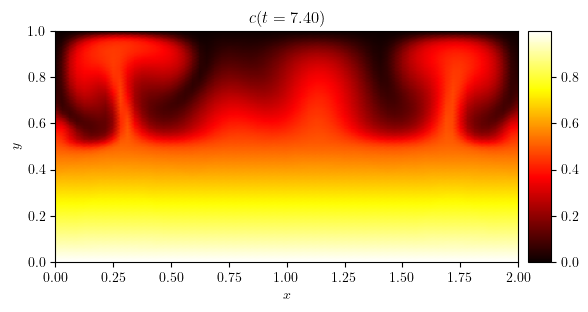

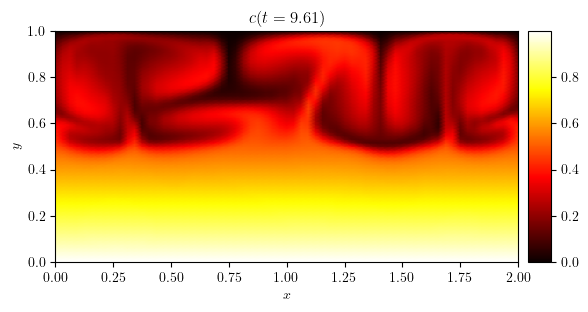

In [10]:
c = simulation['c']
mesh = c.mesh

time_fractions = (0, 0.25, 0.5, 0.75, 0.99)
time_indices = [int(frac * len(c.series)) for frac in time_fractions]
for i in time_indices:
    t = c.time_series[i]
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={t:.2f})$')
    write(fig, f'A21_darcy_brinkman_c(t={t:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$t$', ylabel='$\\max_{\\textbf{x}}|\\textbf{u}|$'>)

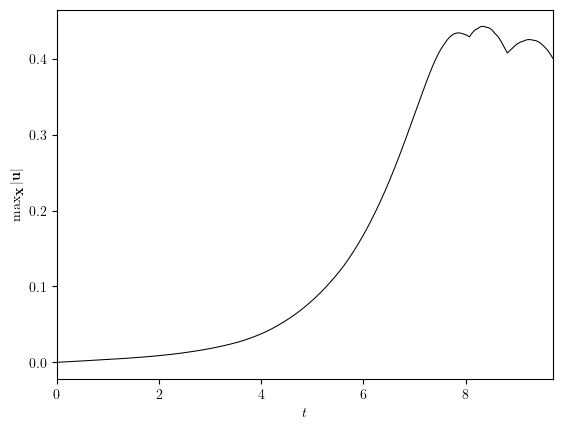

In [3]:
u = simulation['u']
uMax = [maximum(i) for i in u.series]

plot_line((u.time_series, uMax), x_label='$t$', y_label='$\max_{\\textbf{x}}|\\textbf{u}|$')